In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/archive (2)/penguins.csv")  # Adjust path if needed

In [6]:
# Display first few rows
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [9]:
### **🔹 Step 4: Clean the Dataset**

# Check for missing values
print(df.isnull().sum())

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [10]:
# Drop missing values
df = df.dropna().reset_index(drop=True)

In [13]:
### **🔹 Step 5: Select Features for K-Means**
#For clustering, we will use **three numerical features**:
#1. **Culmen Length (`culmen_length_mm`)**
#2. **Culmen Depth (`culmen_depth_mm`)**
#3. **Flipper Length (`flipper_length_mm`)**
#Filter the dataset to these features:

selected_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]
df_selected = df[selected_features]

In [14]:
### **🔹 Step 6: Select 100 Random Data Points**
#To reduce computation, sample **100 random rows** from the dataset:

df_sample = df_selected.sample(n=100, random_state=42).reset_index(drop=True)

In [15]:
# Display the sample dataset
df_sample.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,40.5,18.9,180.0
1,39.6,20.7,191.0
2,42.9,17.6,196.0
3,49.8,17.3,198.0
4,37.6,17.0,185.0


In [17]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

In [18]:
# Apply K-Means Clustering
k = 3  # Assuming 3 clusters (since we know there are 3 species)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

In [19]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

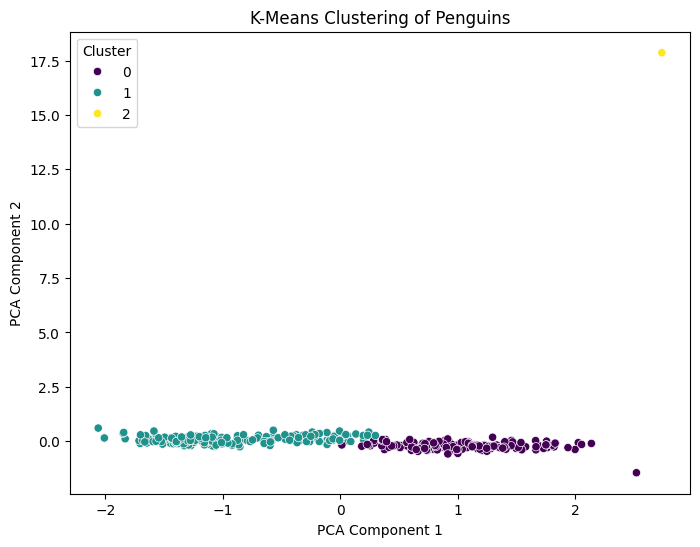

In [20]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca1", y="pca2", hue=df["cluster"], palette="viridis", data=df)
plt.title("K-Means Clustering of Penguins")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()